## This is the project for data cleaning & data analyzing.
The object is used car listings 

Analyzing Used Car Listings on eBay Kleinanzeigen
We will be working on a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle. The version of the dataset we are working with is a sample of 50,000 data points that was prepared by Dataquest including simulating a less-cleaned version of the data.

The data dictionary provided with data is as follows:

dateCrawled - When this ad was first crawled. All field-values are taken from this date.

name - Name of the car.

seller - Whether the seller is private or a dealer.

offerType - The type of listing

price - The price on the ad to sell the car.

abtest - Whether the listing is included in an A/B test.

vehicleType - The vehicle Type.

yearOfRegistration - The year in which which year the car was first registered.

gearbox - The transmission type.

powerPS - The power of the car in PS.

model - The car model name.

kilometer - How many kilometers the car has driven.

monthOfRegistration - The month in which which year the car was first registered.

fuelType - What type of fuel the car uses.

brand - The brand of the car.

notRepairedDamage - If the car has a damage which is not yet repaired.

dateCreated - The date on which the eBay listing was created.

nrOfPictures - The number of pictures in the ad.

postalCode - The postal code for the location of the vehicle.

lastSeenOnline - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.

In [1]:
#it's time to import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
autos = pd.read_csv("autos.csv",encoding='Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
autos.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07
49999,2016-03-14 00:42:12,Opel_Vectra_1.6_16V,privat,Angebot,"$1,250",control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,2016-03-13 00:00:00,0,45897,2016-04-06 21:18:48


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

1/ There are some null values in vehicleType, gearbgx, Model, fuelType,notRepairedDamage, but none of them have more than 20% null values. 

2/ Price & Odometer should be integer for further analysis.

3/ DataCrawled,lastSeen, should be in datetime type.

4/ The column names use camelCase instead of Python's preferred snake, which means we can't just replace spaces with underscores. 

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price_dollars', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

In [7]:
autos.head()

,date_crawled,name,seller,offer_type,price_dollars,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [8]:
autos['price_dollars'] = autos['price_dollars'].str.replace("$","")

In [9]:
#Convert price from object type to integer type, 
#float type is an ratio measurement, that can be used for correlation & regression
autos['price_dollars'] = autos['price_dollars'].str.replace(",","").astype(float)

In [10]:
autos.head()

,date_crawled,name,seller,offer_type,price_dollars,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [11]:
#Convert price from object type to integer type
autos['odometer_km'] = autos['odometer_km'].str.replace("km","")
autos['odometer_km'] = autos['odometer_km'].str.replace(",","").astype(float)
autos.head()

,date_crawled,name,seller,offer_type,price_dollars,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [12]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price_dollars,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [13]:
#Based on this table, some columns are not necessary for our analysis
#Hence, we can drop some columns
#1/num_photos: Has 1 unique values 
#2/seller: Has 2 unique values 
#3/offer_type: Has 2 unique values 

In [14]:
autos['vehicle_type'].value_counts()

limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicle_type, dtype: int64

In [15]:
autos['num_photos'].value_counts()

0    50000
Name: num_photos, dtype: int64

In [16]:
autos = autos.drop(["num_photos", "seller", "offer_type"], axis=1)

In [17]:
autos.head()

,date_crawled,name,price_dollars,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [18]:
autos['price_dollars'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_dollars, dtype: float64

In [19]:
# This set has 1421 zero values, which is likely to be drop
autos['price_dollars'].value_counts().sort_index(ascending=True).head(20)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price_dollars, dtype: int64

In [20]:
autos['price_dollars'].unique().shape
#the prices in this column seem rounded, 
#however given there are 2357 unique values in the column, 
#that may just be people's tendency to round prices on the site.


(2357,)

In [21]:
# The biggest prices seem to be a result of typo, 
# these data also need to be cleaned 
autos['price_dollars'].value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price_dollars, dtype: int64

In [22]:
# Odometer_km seems to be alright, as each value has above 200 counts
autos['odometer_km'].value_counts().sort_index(ascending=True)

5000.0        967
10000.0       264
20000.0       784
30000.0       789
40000.0       819
50000.0      1027
60000.0      1164
70000.0      1230
80000.0      1436
90000.0      1757
100000.0     2169
125000.0     5170
150000.0    32424
Name: odometer_km, dtype: int64

We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, there are more high mileage than low mileage vehicles.

1/There are 156 price_dollars observations have value of $1. Even though, this price seems unrealistically low, they are allowed to be kept because there is a 156 reasonable number
2/In term of the maximum value for price analysis, from $350,000 to $999,990 is a incredibly big gap 

In [25]:
autos = autos[autos["price_dollars"].between(1,upper)]
autos["price_dollars"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price_dollars, dtype: float64

In [24]:
#In larger samples, to erase outliner perhaps 
#a value of 2 standard deviations can be used.
#I used 2 standard deviations because it eliminate values bigger than $350,000
# calculate summary statistics
data_mean, data_std = autos["price_dollars"].mean(), autos["price_dollars"].std()
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

## Explore the data columns

In [26]:
autos['date_crawled'].str[:10].value_counts(normalize=True,dropna=False).sort_index(ascending=True)

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

There was a hugh decline in the percentage of listings crawled in the last three days

In [27]:
autos['ad_created'].str[:10].value_counts(normalize=True,dropna=False).sort_index(ascending=True)

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

The same story also happens to ad_created

In [28]:
autos['last_seen'].str[:10].value_counts(normalize=True,dropna=False).sort_index(ascending=True)

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The percentage of last_seen also increases significant, indicates the buyers viewed less listings related to cars sales in the last three days. Besides that, it's maybe due to crawling period ending.

In [30]:
autos['registration_year'].describe(include="all")

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

There are weird values, min = 1000, max = 9999, hence, just need to include registration since Ebays was founded & until now

In [36]:
autos_clean = autos[autos['registration_year'].between(1900,2016)]
autos_clean['registration_year'].value_counts().sort_index(ascending=True)

1910       5
1927       1
1929       1
1931       1
1934       2
1937       4
1938       1
1939       1
1941       2
1943       1
1948       1
1950       3
1951       2
1952       1
1953       1
1954       2
1955       2
1956       4
1957       2
1958       4
1959       6
1960      23
1961       6
1962       4
1963       8
1964      12
1965      17
1966      22
1967      26
1968      26
        ... 
1987      72
1988     135
1989     174
1990     347
1991     339
1992     370
1993     425
1994     629
1995    1227
1996    1373
1997    1951
1998    2363
1999    2897
2000    3156
2001    2636
2002    2486
2003    2699
2004    2703
2005    2936
2006    2670
2007    2277
2008    2215
2009    2085
2010    1589
2011    1623
2012    1310
2013     803
2014     663
2015     392
2016    1220
Name: registration_year, Length: 78, dtype: int64

Because a car can't be first registered after the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

In [37]:
autos_clean['registration_year'].value_counts(normalize=True).sort_index(ascending=True)

1910    0.000107
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000043
1937    0.000086
1938    0.000021
1939    0.000021
1941    0.000043
1943    0.000021
1948    0.000021
1950    0.000064
1951    0.000043
1952    0.000021
1953    0.000021
1954    0.000043
1955    0.000043
1956    0.000086
1957    0.000043
1958    0.000086
1959    0.000129
1960    0.000493
1961    0.000129
1962    0.000086
1963    0.000171
1964    0.000257
1965    0.000364
1966    0.000471
1967    0.000557
1968    0.000557
          ...   
1987    0.001542
1988    0.002892
1989    0.003727
1990    0.007433
1991    0.007262
1992    0.007926
1993    0.009104
1994    0.013474
1995    0.026285
1996    0.029412
1997    0.041794
1998    0.050620
1999    0.062060
2000    0.067608
2001    0.056468
2002    0.053255
2003    0.057818
2004    0.057904
2005    0.062895
2006    0.057197
2007    0.048778
2008    0.047450
2009    0.044665
2010    0.034040
2011    0.034768
2012    0.028063
2013    0.017202
2014    0.0142

It appears that most cars were registered in the last 20 years

## Explore Price by Brand

The purpose to see which brands are more likely to be sold with high price

In [38]:
autos_clean['brand'].value_counts(normalize=True).sort_values(ascending=False)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

German car manufacturers represent the four most populars brands in the listings pool, which accounts for almost 50%. Volkswagen is by far the most popular brands with approximatedly doubl the number of cars for sales

In [40]:
brand_counts = autos_clean["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [44]:
brand_mean_prices = {}
for brand in common_brands:
    brand_only = autos_clean[autos_clean['brand']==brand]
    mean_price = brand_only['price_dollars'].mean()
    brand_mean_prices[brand] = int(mean_price)
    
brand_mean_prices    

{'audi': 9336,
 'bmw': 8332,
 'ford': 3749,
 'mercedes_benz': 8628,
 'opel': 2975,
 'volkswagen': 5402}

Three most expensive car brands are: audi, bmw, mercedes_benz

## Optional: Explore relationship between milaage & price

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
autos_clean.head()

,date_crawled,name,price_dollars,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


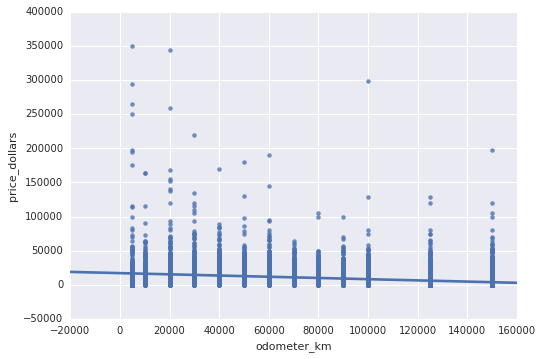

In [55]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.regplot(x="odometer_km",y="price_dollars",data=autos_clean)

It can be seen that cars with smaller value in odometer, it can be sold with some significant prices as there are more data points with high price here 